# Loading the Dataset and Perform Exploratory Data Analysis (EDA)

In [45]:
import pandas as pd
import numpy as np

In [46]:
train=pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [50]:
train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


# Create Visualizations

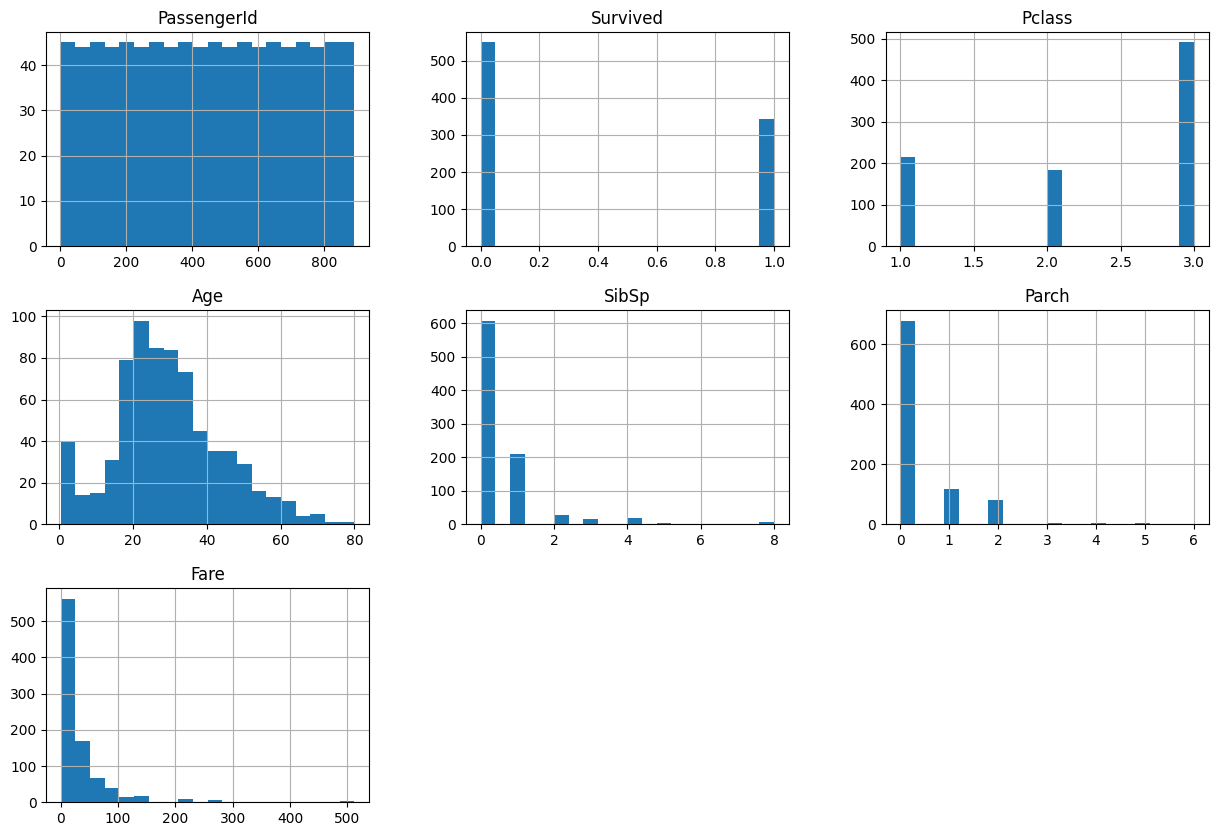

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
train.hist(bins=20, figsize=(15,10))
plt.show()

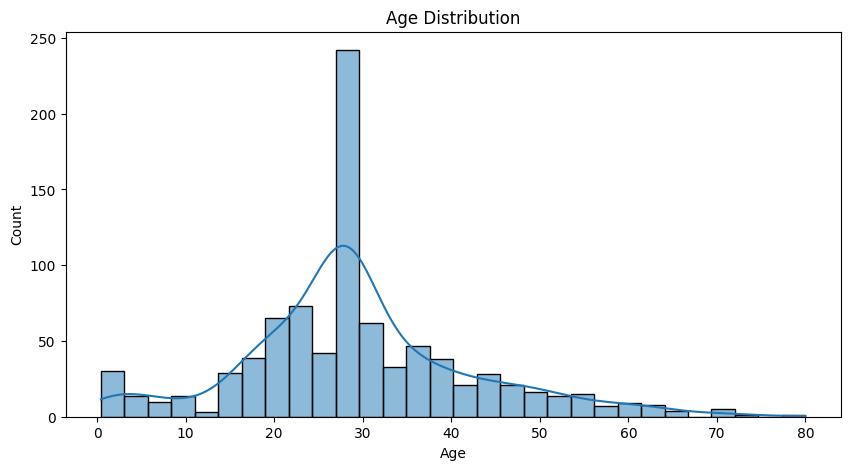

In [80]:
plt.figure(figsize=(10, 5))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

<Axes: >

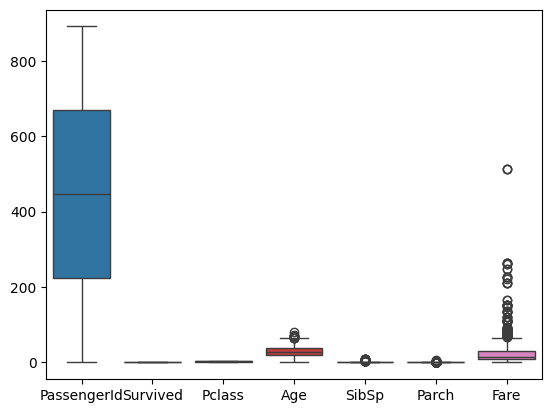

In [52]:
sns.boxplot(data=train)

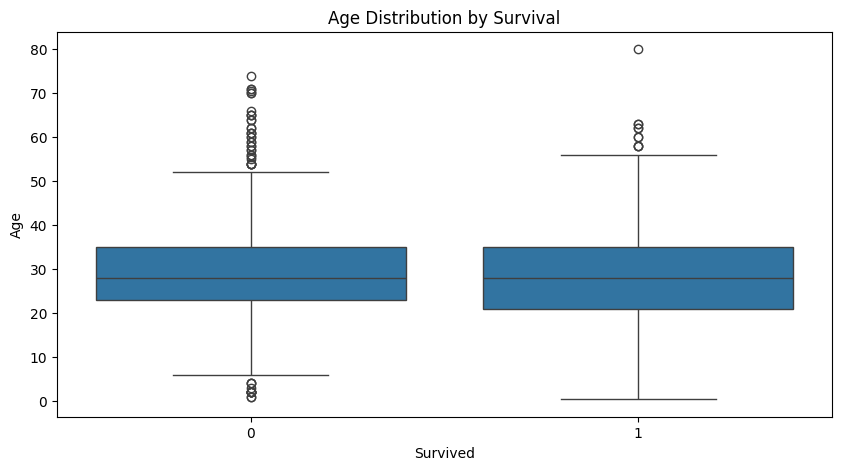

In [81]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Age Distribution by Survival')
plt.show()

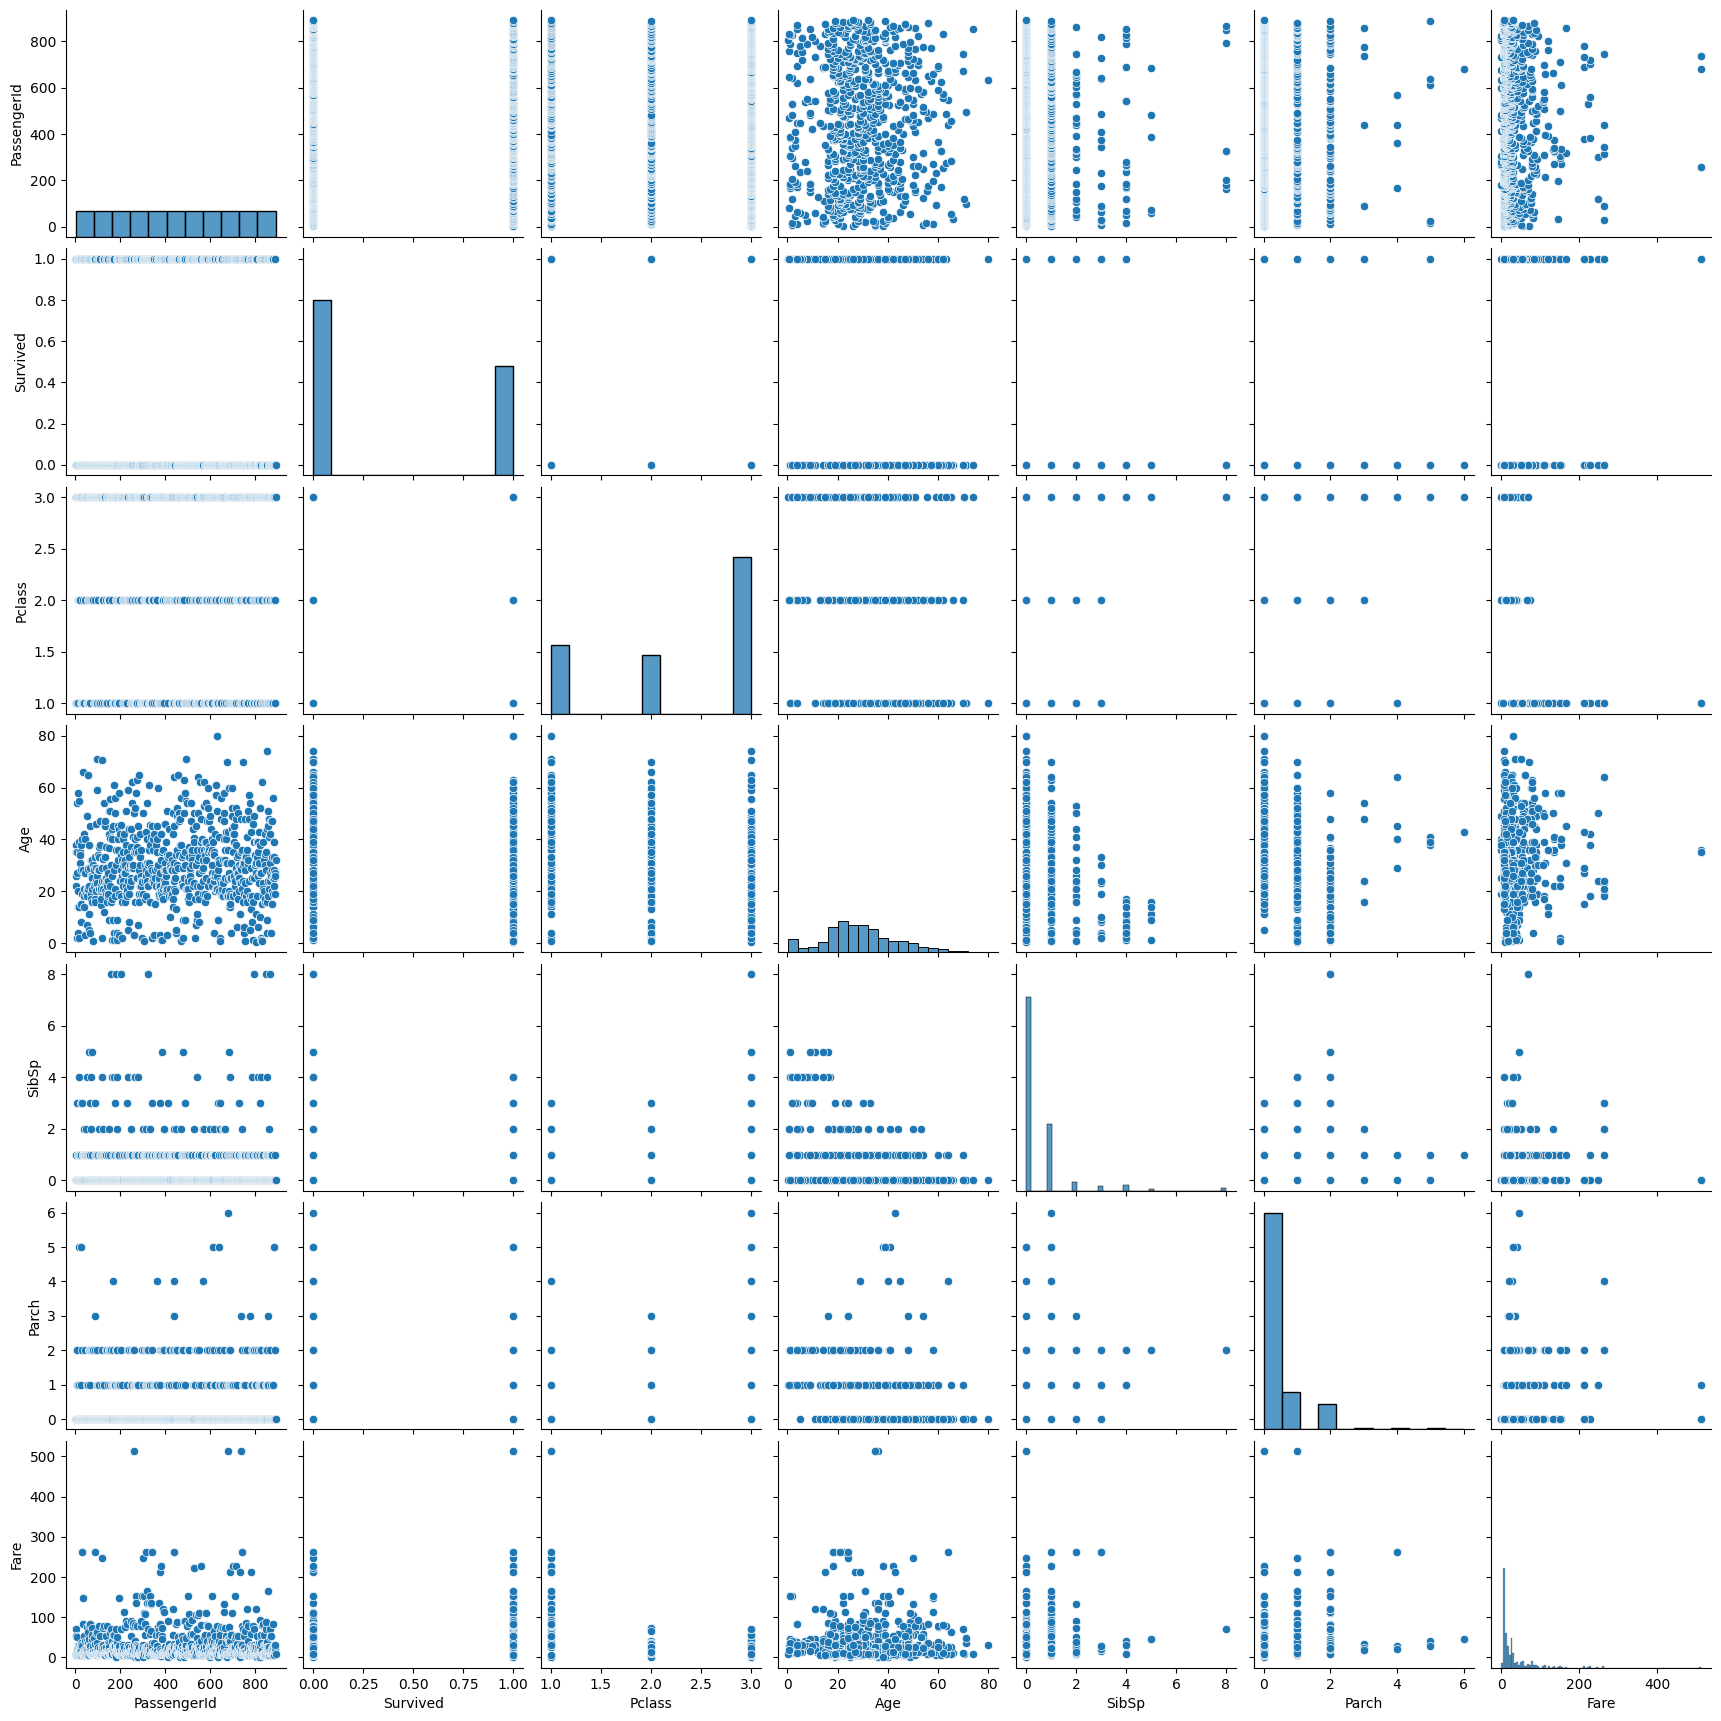

In [53]:
sns.pairplot(train)
plt.show()

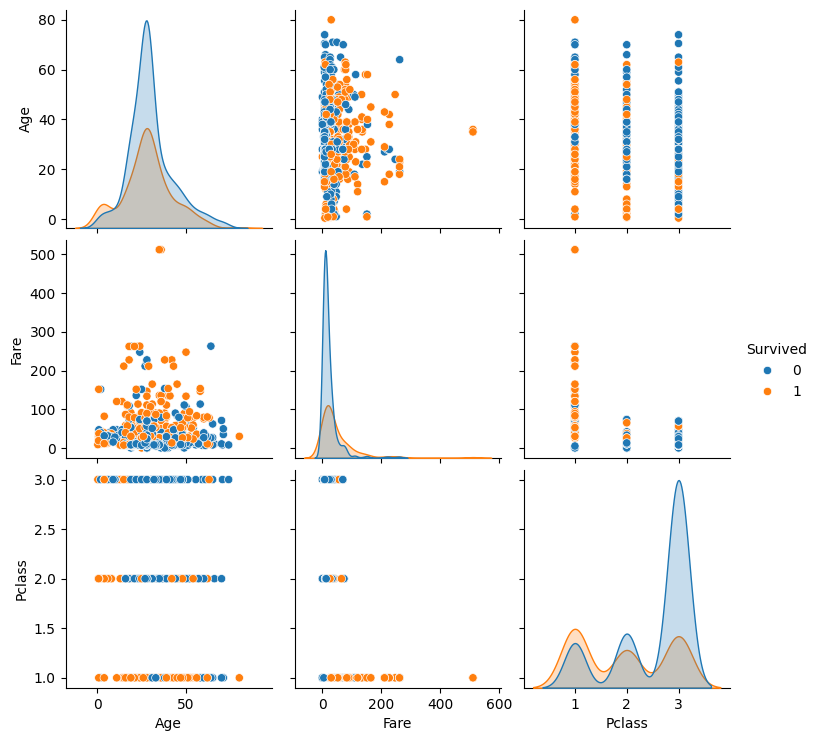

In [82]:
sns.pairplot(train[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()

# Data Preprocessing

In [54]:
train['Age'].fillna(train['Age'].median(), inplace=True)


<ipython-input-54-82f4ae3f6554>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)


In [55]:
train['Embarked'].fillna(train['Embarked'].mode(), inplace=True)


<ipython-input-55-07a7533d52ef>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode(), inplace=True)


In [56]:
train.drop(columns=['Cabin'], inplace=True)


In [57]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [58]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)


In [59]:
train.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [60]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


# Model Building

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [62]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [65]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Model Evaluation

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [67]:
y_pred = model.predict(X_test)

In [68]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])


In [69]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-Score: 0.7638888888888888
ROC-AUC: 0.881981981981982


# Interpretation

In [71]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coefficients


,Feature,Coefficient
0,Pclass,-0.784441
1,Age,-0.396919
2,SibSp,-0.348851
3,Parch,-0.095401
4,Fare,0.124587
5,Sex_male,-1.275700
6,Embarked_Q,-0.049019
7,Embarked_S,-0.196196


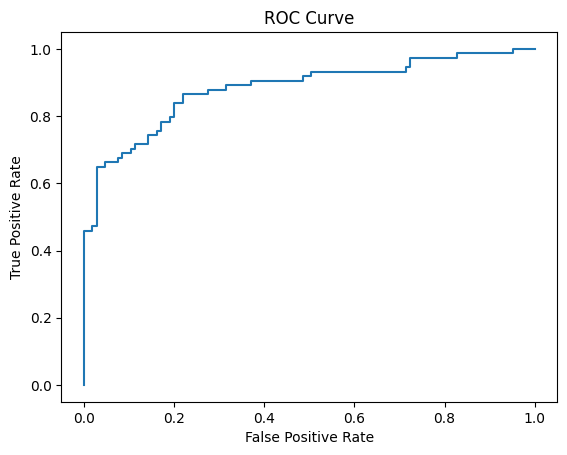

In [70]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# Deployment with *Streamlit*

In [73]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.1 MB/s eta 0:00:00


In [76]:
import streamlit as st
import pickle
import os

# Try to get the path using __file__, if it's not available, use the current working directory
try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd() # Use current working directory as fallback

# Construct the full path to the model file
model_path = os.path.join(current_dir, 'logistic_model.pkl')

# Load the trained model using the full path
# If the file doesn't exist, inform the user to save the model first.
try:
    model = pickle.load(open(model_path, 'rb'))
except FileNotFoundError:
    st.error("Model file not found. Please train and save the model as 'logistic_model.pkl' in the same directory as this script.")
    st.stop()  # Stop execution if the model file is not found

# Title of the Streamlit app
st.title("Survival Prediction App")

# ... (rest of your code)

2024-10-24 05:32:45.725 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-24 05:32:45.832 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-24 05:32:45.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-24 05:32:45.843 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-24 05:32:45.848 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-24 05:32:45.851 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

# Interview Questions

1.Difference between Precision and Recall

Precision is the ratio of correctly predicted positive observations to the total predicted positives. Precision = TP / (TP + FP).
Recall (Sensitivity) is the ratio of correctly predicted positive observations to all actual positives. Recall = TP / (TP + FN)

2.What is Cross-Validation and Why is it Important?

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. It splits the data into training and validation sets multiple times to ensure the model generalizes well. In binary classification, it prevents overfitting and ensures the model’s performance is not overly optimistic.





